In [26]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv("../data/heart.csv")

# Exploration

In [8]:
for col in df.columns:
    print(col + " : " + str(df[col].isnull().sum()))

age : 0
sex : 0
cp : 0
trtbps : 0
chol : 0
fbs : 0
restecg : 0
thalachh : 0
exng : 0
oldpeak : 0
slp : 0
caa : 0
thall : 0
output : 0


<Axes: >

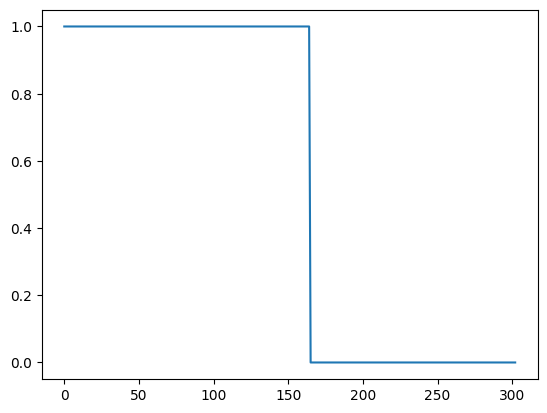

In [9]:
df["output"].plot()

In [10]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

# Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["age", "sex"]], df["output"], test_size=0.2, random_state=42)

In [14]:
X_test.to_csv("../data/X_test.csv", index=False)
y_test.to_csv("../data/y_test.csv", index=False)

# Model

In [21]:
X_train

,age,sex
132,42,1
202,58,1
196,46,1
75,55,0
176,60,1
...,...,...
188,50,1
71,51,1
106,69,1
270,46,1


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe = Pipeline(
    [ ('LogisticRegression', LogisticRegression(random_state=0))
    ]
)
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

Pipeline(steps=[('LogisticRegression', LogisticRegression(random_state=0))])

In [25]:
preds_test = pipe.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, preds_test)
print(accuracy)

0.5901639344262295


In [40]:
str(pipe.predict(pd.DataFrame([[1, 1]]) ))

C:\Users\pierre.leroy\AppData\Local\Continuum\miniconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'[1]'

# Sauvegarde

In [37]:
import pickle
# save the model to disk
filename = '../app/datascience_model/first_model.sav'
pickle.dump(pipe, open(filename, 'wb'))